In [1]:
import pandas as pd

df = pd.read_csv('https://github.com/yarathealmighty/dumps/blob/main/data/not_na_tags/latin_w2v.csv?raw=true')
df

,Id,Tags,Question,Answer,Question_Vector
0,1,"['classical-latin', 'meaning', 'vocabulary', '...","Are ""-que"" and ""et"" equivalent? I was taught t...","The way I was taught was that, as a general r...",[-0.56718177 -0.08636381 0.05472869 0.138598...
1,2,"['contemporary-latin', 'pronouns', 'articles',...","Why is ""ille"" used in Winnie ille Pu and Hobbi...","It's true that in Classical Latin, ille is a ...",[-0.59893906 -0.18989469 0.17554568 0.22921 ...
2,4,"['agreement', 'predicate', 'gender', 'adjectiv...",What gender should a predicate adjective be to...,Bennett's New Latin Grammar ( this link will ...,[-0.6498057 -0.15954323 0.10755014 0.170051...
3,5,['pronunciation'],What effect should a macron have on the sound ...,"In most modern texts, the whole purpose of us...",[-0.5373992 -0.14705694 0.39335102 0.563400...
4,7,"['etymology', 'particle', 'hebrew']","Does ""ad"" have its origin in Hebrew/Semitic la...","No, the similarity is almost certainly accide...",[-0.61840487 -0.08271527 0.04258449 0.287883...
...,...,...,...,...,...
5879,23416,"['english-to-latin-translation', 'classical-la...","Can someone help translating ""one must die for...",One possibility: necesse est alterum mori ut ...,[-1.1481794 -0.19188693 -0.02219345 0.129331...
5880,23420,['english-to-latin-translation'],Four more loaves please This new question: How...,"In Nicholas Oulton's Book II, p.50: ""plures c...",[-0.72917694 -0.37934136 0.17634495 0.171811...
5881,23425,"['latin-to-english-translation', 'mathematics']","Mathematical Latin Help So, I'm a PhD student ...","I understand ""ut quotiens sit integer complex...",[-0.5885769 -0.21838634 0.14769343 0.280921...
5882,23429,"['latin-to-english-translation', 'translation-...",Does “interranima” mean “inner soul”? I came a...,"No. Anima is the Latin word for soul, apart f...",[-1.1123039 -0.08139609 -0.25557762 0.144546...


In [22]:
import torch

vectors = []
for i in range(0,len(df)):
  vector = df['Question_Vector'][i][1:-1].split()
  new_vector = []
  for value in vector:
    value = float(value)
    new_vector.append(value)
  vectors.append(new_vector)

df['Question_Vector'] = vectors
df

,Id,Tags,Question,Answer,Question_Vector
0,1,"['classical-latin', 'meaning', 'vocabulary', '...","Are ""-que"" and ""et"" equivalent? I was taught t...","The way I was taught was that, as a general r...","[-0.56718177, -0.08636381, 0.05472869, 0.13859..."
1,2,"['contemporary-latin', 'pronouns', 'articles',...","Why is ""ille"" used in Winnie ille Pu and Hobbi...","It's true that in Classical Latin, ille is a ...","[-0.59893906, -0.18989469, 0.17554568, 0.22921..."
2,4,"['agreement', 'predicate', 'gender', 'adjectiv...",What gender should a predicate adjective be to...,Bennett's New Latin Grammar ( this link will ...,"[-0.6498057, -0.15954323, 0.10755014, 0.170051..."
3,5,['pronunciation'],What effect should a macron have on the sound ...,"In most modern texts, the whole purpose of us...","[-0.5373992, -0.14705694, 0.39335102, 0.563400..."
4,7,"['etymology', 'particle', 'hebrew']","Does ""ad"" have its origin in Hebrew/Semitic la...","No, the similarity is almost certainly accide...","[-0.61840487, -0.08271527, 0.04258449, 0.28788..."
...,...,...,...,...,...
5879,23416,"['english-to-latin-translation', 'classical-la...","Can someone help translating ""one must die for...",One possibility: necesse est alterum mori ut ...,"[-1.1481794, -0.19188693, -0.02219345, 0.12933..."
5880,23420,['english-to-latin-translation'],Four more loaves please This new question: How...,"In Nicholas Oulton's Book II, p.50: ""plures c...","[-0.72917694, -0.37934136, 0.17634495, 0.17181..."
5881,23425,"['latin-to-english-translation', 'mathematics']","Mathematical Latin Help So, I'm a PhD student ...","I understand ""ut quotiens sit integer complex...","[-0.5885769, -0.21838634, 0.14769343, 0.280921..."
5882,23429,"['latin-to-english-translation', 'translation-...",Does “interranima” mean “inner soul”? I came a...,"No. Anima is the Latin word for soul, apart f...","[-1.1123039, -0.08139609, -0.25557762, 0.14454..."


In [25]:
def get_unique_tags(df):
  tags_list = df['Tags']
  unique_tags = set([])
  for tags in tags_list:
    tags = tags.split("'")[1:-1:2]
    for tag in tags:
      unique_tags.add(tag)
  return list(unique_tags)

In [36]:
vectors = df['Question_Vector']
tensors = [torch.tensor(vector, dtype=torch.float32) for vector in vectors]

n_letters = len(tensors[0])

categories = get_unique_tags(df)
n_categories = len(categories)

In [37]:
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [54]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import numpy as np

tokenized_questions = [simple_preprocess(q) for q in df['Question']]

model = Word2Vec(sentences=tokenized_questions, vector_size=50, window=5, min_count=1, workers=4)

def get_vector(question, model):
    tokens = simple_preprocess(question)
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

def questionToTensor(question):
    vector = get_vector(question,model)
    tensor = torch.tensor(vector, dtype=torch.float32)
    return tensor

In [43]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return categories[category_i], category_i

print(categoryFromOutput(output))

('architecture', 169)


In [42]:
#TODO question to tensor func
input = tensors
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[9], hidden)
print(output)

tensor([[-5.8322, -5.9854, -6.2983, -6.1002, -5.9139, -5.6330, -6.2475, -5.8941,
         -6.3022, -6.0690, -6.4355, -5.3372, -5.8288, -5.4382, -5.8425, -6.1121,
         -5.9006, -6.2415, -5.8196, -5.8917, -5.7064, -6.4154, -6.1437, -6.1192,
         -5.4735, -6.0489, -5.7920, -6.0957, -6.2131, -6.2790, -6.0311, -6.1888,
         -6.3078, -5.4552, -6.0822, -5.5626, -5.7670, -6.0632, -6.1634, -6.0866,
         -5.6003, -5.9745, -6.0201, -5.9641, -5.9879, -6.0521, -5.4389, -5.6409,
         -6.2925, -5.9547, -5.6382, -5.7608, -6.0414, -5.8430, -6.1741, -6.3824,
         -6.0466, -6.5991, -6.1108, -5.7581, -5.8238, -6.1709, -5.8125, -6.0362,
         -6.3205, -6.0065, -5.4177, -5.3892, -6.1415, -6.4122, -6.5310, -6.4576,
         -5.8710, -6.1869, -5.9102, -5.9766, -5.8835, -5.6292, -5.9593, -6.1583,
         -5.9930, -6.1118, -6.8523, -5.8785, -5.7829, -6.2465, -6.1360, -5.9382,
         -6.0236, -5.7508, -6.2362, -6.0714, -6.0840, -6.3369, -5.9372, -5.5379,
         -6.1173, -6.2826, -

In [50]:
tagged_questions = {}
for tag in categories:
    tagged_questions[tag] = df[df['Tags'].apply(lambda tags: tag in tags)]['Question'].tolist()

print(tagged_questions['meaning'])

['Are "-que" and "et" equivalent? I was taught that one can use the \'-que\' suffix to string together multiple words, in a similar way to putting \'et\' between them. Are these two equivalent? Did one have a connotation in classical (Caesar-era) Latin that the other didn\'t?', 'What\'s the difference between vel, aut, -ve, et cetera? So I see "vel", "aut", and "-ve" being used (mostly) interchangeably in the Latin I read. Is there any idiomatic difference, or can they be used interchangeably? For example, is it valid Latin (and does it have the right meaning) if I use "-ve" for either/or, like I would with "aut"? Licet tibi habere aut vim aut laetitia Licet tibi habere vim ve laetitia ve And does using "vel" instead of "aut" change the meaning in any way? Licet tibi habere vel vim vel laetitia', 'What does memento mori actually mean? I\'m wondering what memento mori actually means. From Wikipedia , I see the meaning is "you must die" but that makes it sound like a threat. Legend said 

In [73]:
category = 'meaning'
category_tensor = torch.tensor([categories.index(category)], dtype=torch.long)
category_tensor = torch.unsqueeze(category_tensor, 0)
category_tensor

tensor([[176]])

In [91]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(categories)
    question = randomChoice(tagged_questions[category])
    category_tensor = torch.tensor([categories.index(category)], dtype=torch.long)
    question_tensor = questionToTensor(question)
    question_tensor = torch.unsqueeze(question_tensor, 0)
    return category, question, category_tensor, question_tensor

for i in range(10):
    category, question, category_tensor, question_tensor = randomTrainingExample()
    print('category =', category, '/ question =', question, '\n\n------------------------------------------------------------------------------------------------------------------------------------------\n')

category = soft-question / question = How to find scholarly articles related to Latin? If I want to find research articles of some kind to learn more about a particular topic related to Latin, what should I do?
I am a trained scientist, but my own research is on a very different field. If I want to find mathematical articles, it is often best to use arXiv or MathSciNet .
The latter requires subscription but the database is very comprehensive and the reviews are useful.
The former is a preprint server where many mathematicians and physicists make their work freely available when they submit to a journal, making the articles readable long before the review process is complete.
Sometimes Google Scholar is useful and it includes all fields, but I find it somewhat unreliable or inconsistent. I am looking for a high level overview of how to find articles.
What do researchers in Latin language, archaeology, history, literature and similar fields actually do when they want to read about someth

In [78]:
criterion = nn.NLLLoss()

In [63]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, question_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(question_tensor.size()[0]):
        output, hidden = rnn(question_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [97]:
import time
import math

n_iters = 400000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, question, category_tensor, question_tensor = randomTrainingExample()
    output, loss = train(category_tensor, question_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s ... / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, question[:30], guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 1% (0m 9s) 6.0091 What is a digit? Is there a go ... / euphemism ✗ (mathematics)
10000 2% (0m 18s) 2.8577 Has these Umbrian words been r ... / umbrian ✗ (italic-languages)
15000 3% (0m 25s) 1.7472 Does Ordericus/i end with a "u ... / accidence ✓
20000 5% (0m 34s) 5.9016 "Desinat in piscem" in Horace' ... / terminology ✗ (horatius)
25000 6% (0m 43s) 2.9726 Present or imperfect subjuncti ... / nominativus-cum-infinitivo ✗ (consecutio-temporum)
30000 7% (0m 51s) 3.7163 Numbering of persons It is con ... / calendarium ✗ (grammarians)
35000 8% (1m 0s) 5.8029 Is there such a thing as "word ... / early-latin ✗ (punctuation)
40000 10% (1m 9s) 5.1678 Could 'com-' function as a cau ... / composition ✗ (affixes)
45000 11% (1m 17s) 5.8794 Why no relative pronoun in ἄνθ ... / singular ✗ (new-testament)
50000 12% (1m 26s) 6.1640 Does D/L variation go back to  ... / borrowing ✗ (old-latin)
55000 13% (1m 35s) 3.7276 What is the etymology of the L ... / architecture ✗ (academic-latin)
60000 15% (1

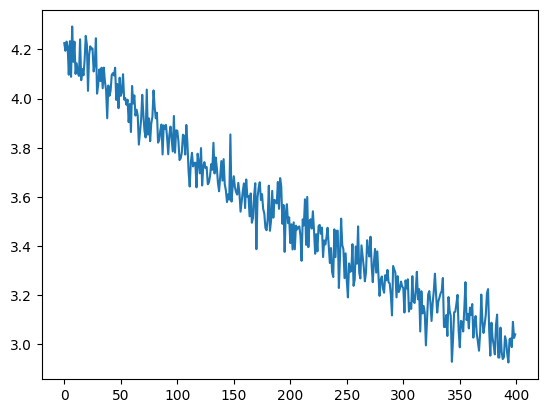

In [98]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

<ipython-input-99-4f7b7cf21673>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories, rotation=90)
<ipython-input-99-4f7b7cf21673>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


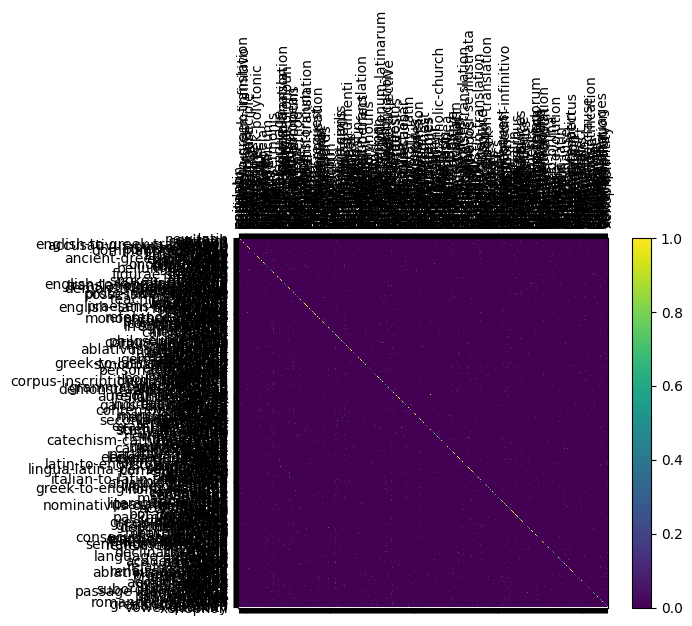

In [99]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(question_tensor):
    hidden = rnn.initHidden()

    for i in range(question_tensor.size()[0]):
        output, hidden = rnn(question_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, question, category_tensor, question_tensor = randomTrainingExample()
    output = evaluate(question_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + categories, rotation=90)
ax.set_yticklabels([''] + categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

#note: sok a tag, szóval az még TODO hogy olvasható is legyen